In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Geometry import Point2D
from IPython.display import display, SVG

def label_bonds(mol, size=(300, 150), offset_x = 0, offset_y = 0):
    # Generate 2D coordinates for visualization
    Chem.rdDepictor.Compute2DCoords(mol)

    # Define image size and initialize an SVG drawer
    drawer = Draw.MolDraw2DSVG(*size)

    # Draw the molecule first
    drawer.DrawMolecule(mol)

    # Add bond numbers
    for bond in mol.GetBonds():
        idx = bond.GetIdx()

        # Get the positions of the atoms of the bond
        begin_atom_pos = mol.GetConformer().GetAtomPosition(bond.GetBeginAtomIdx())
        end_atom_pos = mol.GetConformer().GetAtomPosition(bond.GetEndAtomIdx())

        # Calculate midpoint of bond as midpoint between the two atoms
        mid_x = (begin_atom_pos.x + end_atom_pos.x) / 2
        mid_y = (begin_atom_pos.y + end_atom_pos.y) / 2

        # Optionally, offset the
        #   x coordinate to move the label to the right (positive offset) or left (negative offset) of the bond
        #   y coordinate to move the label above (positive offset) or below (negative offset) the bond
        mid_point = Point2D(mid_x + offset_x, mid_y + offset_y)

        # Add bond index at the offset midpoint
        drawer.DrawString(str(idx), mid_point)

    drawer.FinishDrawing()

    svg = drawer.GetDrawingText()

    return svg


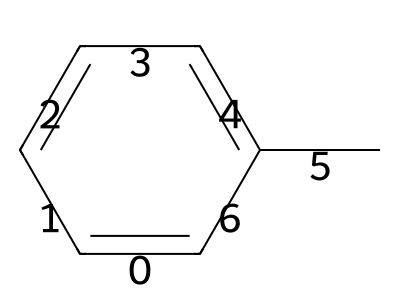

In [9]:
# Create a molecule from SMILES
mol = Chem.MolFromSmiles('c1ccccc1C')
svg = label_bonds(mol, size=(400,300), offset_y=-0.2)
display(SVG(svg))